## 20 Newsgroup 분류하기
---
` `  
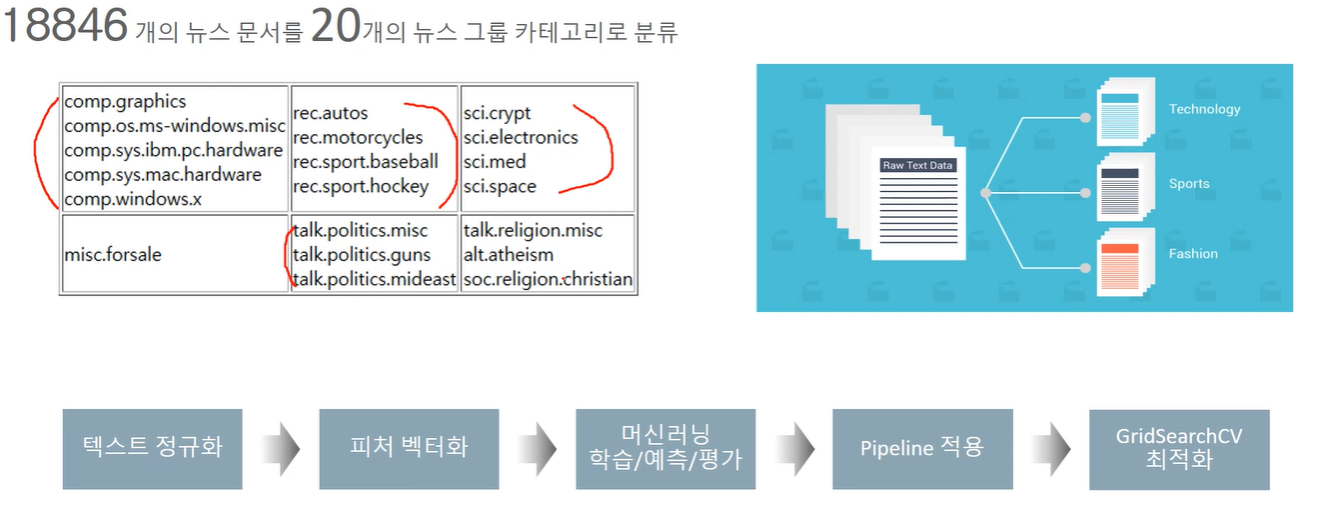

**데이터 로딩과 데이터 구성 확인**

In [1]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)

In [2]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [3]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n',news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

**학습과 테스트용 데이터 생성**

In [5]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))


<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


In [6]:
X_train

["\n\nWhat I did NOT get with my drive (CD300i) is the System Install CD you\nlisted as #1.  Any ideas about how I can get one?  I bought my IIvx 8/120\nfrom Direct Express in Chicago (no complaints at all -- good price & good\nservice).\n\nBTW, I've heard that the System Install CD can be used to boot the mac;\nhowever, my drive will NOT accept a CD caddy is the machine is off.  How can\nyou boot with it then?\n\n--Dave\n",
 '\n\t"And in that day you will ask Me no question.  Truly, truly, I say to \n\tyou, if you shall ask the Father for anything, He will give it to you \n\tin my name.  Until now you have asked for nothing in My name; ask, and \n\tyou will receive, that your joy may be made full."\n\t\t\t\t-John 16:23-24\n\nI don\'t believe that we necessarily have to say " . . . In Christ\'s name.  \nAmen," for our prayers to be heard, but it glorifies the Son, when we \nacknowledge that our prayer is made possible by Him.  I believe that just as \nthose who were saved in the OT, co

**Count 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가**

주의: 학습 데이터에 대해 fit()된 CountVectorizer를 이용해서 테스트 데이터를 피처 벡터화 해야함.  
테스트 데이터에서 다시 CountVectorizer의 fit_transform()을 수행하거나 fit()을 수행 하면 안됨.  
이는 이렇게 테스트 데이터에서 fit()을 수행하게 되면 기존 학습된 모델에서 가지는 feature의 갯수가 달라지기 떄문임.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
# 개정판 소스 코드 변경(2019.12.24)
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행. 
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

C:\Users\67416\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CountVectorized Logistic Regression 의 예측 정확도는 0.605


**TF-IDF 피처 변환과 머신러닝 학습/예측/평가**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))


TF-IDF Logistic Regression 의 예측 정확도는 0.674


**stop words 필터링을 추가하고 ngram을 기본(1,1) 에서 (1,2)로 변경하여 피처 벡터화**

In [10]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))


TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.692


**GridSearchCV로 LogisticRegrssion C 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정. 
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가. 
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


### 사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합
---

In [ ]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(C=10))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능. 
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 
# 파라미터/하이퍼 파라미터 이름과 값을 설정. . 
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1,5,10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

